In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

x, y = make_regression(n_samples = 100, n_features = 2, n_informative = 2, random_state = 38)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 8)
lr = LinearRegression().fit(x_train, y_train)

In [17]:
print('\n\n\n代码运行结果：')
print('===========\n')
print("lr.coef_: {}".format(lr.coef_[:]))
print("lr.intercept_: {}".format(lr.intercept_))
print('\n==========')
print('\n\n\n')




代码运行结果：

lr.coef_: [ 70.38592453   7.43213621]
lr.intercept_: -1.4210854715202004e-14







In [18]:
print('\n\n\n代码运行结果：')
print('===========\n')
print("训练数据集的分：{:2f}".format(lr.score(x_train, y_train)))
print("测试数据集的分：{:2f}".format(lr.score(x_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据集的分：1.000000
测试数据集的分：1.000000







In [19]:
from sklearn.datasets import load_diabetes

x, y = load_diabetes().data, load_diabetes().target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 8)

lr = LinearRegression().fit(x_train, y_train)

In [20]:
print('\n\n\n代码运行结果：')
print('===========\n')
print("训练数据集的分：{:2f}".format(lr.score(x_train, y_train)))
print("测试数据集的分：{:2f}".format(lr.score(x_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据集的分：0.530381
测试数据集的分：0.459344







In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)

In [22]:
print('\n\n\n代码运行结果：')
print('===========\n')
print("训练数据集的分：{:.2f}".format(ridge.score(x_train, y_train)))
print("测试数据集的分：{:.2f}".format(ridge.score(x_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据集的分：0.43
测试数据集的分：0.43







In [23]:
ridge10 = Ridge(alpha = 10).fit(x_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(x_train, y_train)

In [24]:
print('\n\n\n代码运行结果：')
print('===========\n')
print("训练数据集的分：{:2f}".format(ridge10.score(x_train, y_train)))
print("测试数据集的分：{:2f}".format(ridge10.score(x_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据集的分：0.151200
测试数据集的分：0.162020







In [25]:
import matplotlib.pyplot as plt
lr = LinearRegression().fit(x_train, y_train)

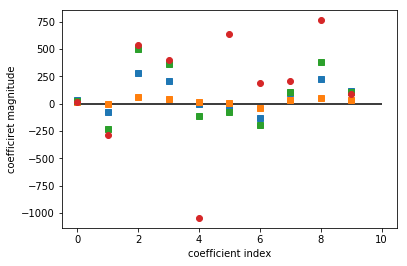

In [26]:
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')

plt.plot(ridge10.coef_, 's', label = 'Ridge alpha = 10')

plt.plot(ridge01.coef_, 's', label = 'Ridge alpha = 0.1')

plt.plot(lr.coef_, 'o', label = 'Linear regression')
plt.xlabel("coefficient index")
plt.ylabel("coefficiret magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.show()

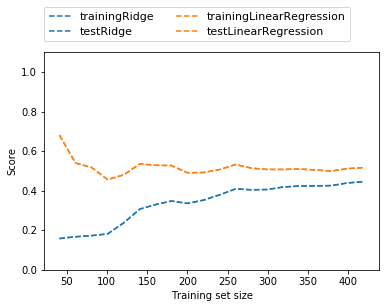

In [27]:
from sklearn.model_selection import learning_curve, KFold
import numpy as np

def plot_learning_curve(est, x, y):
    
    training_set_size, train_scores, test_scores = learning_curve(est, x, y, train_sizes = np.linspace(.1, 1, 20), cv = KFold(20, shuffle = True, random_state=1))
    
    esrumator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis = 1), '--', label = "training" + esrumator_name)
    
    plt.plot(training_set_size, train_scores.mean(axis = 1), '--', label = "test" + esrumator_name, c = line[0].get_color())
    
    plt.xlabel("Training set size")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    
plot_learning_curve(Ridge(alpha = 1), x, y)
plot_learning_curve(LinearRegression(), x, y)
plt.legend(loc = (0, 1.05), ncol = 2, fontsize = 11)
plt.show()

# 使用L1正则化的线性模型--套索回归

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)

In [35]:
print("套索回归的训练数据集得分: {:.2f}".format(lasso.score(x_train, y_train)))
print("套索回归的测试数据集得分: {:.2f}".format(lasso.score(x_test, y_test)))

套索回归的训练数据集得分: 0.36
套索回归的测试数据集得分: 0.37


# 欠拟合

In [42]:
lasso01 = Lasso(alpha = 0.1, max_iter = 100000).fit(x_train, y_train)#欠拟合可以降低alpha的值

alpha = 0.1时套索回归的训练数据集得分: 0.52
alpha = 0.1时套索回归的测试数据集得分: 0.48
alpha = 0.1时套索回归使用的特征数: 7


In [43]:
print("alpha = 0.1时套索回归的训练数据集得分: {:.2f}".format(lasso01.score(x_train, y_train)))
print("alpha = 0.1时套索回归的测试数据集得分: {:.2f}".format(lasso01.score(x_test, y_test)))
print("alpha = 0.1时套索回归使用的特征数: {}".format(np.sum(lasso01.coef_ != 0)))

alpha = 0.1时套索回归的训练数据集得分: 0.52
alpha = 0.1时套索回归的测试数据集得分: 0.48
alpha = 0.1时套索回归使用的特征数: 7


# 过拟合

In [44]:
lasso0001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(x_train, y_train)#plaha值太低会出现过拟合
print("alpha = 0.0001时套索回归的训练数据集得分: {:.2f}".format(lasso0001.score(x_train, y_train)))
print("alpha = 0.0001时套索回归的测试数据集得分: {:.2f}".format(lasso0001.score(x_test, y_test)))
print("alpha = 0.0001时套索回归使用的特征数: {}".format(np.sum(lasso0001.coef_ != 0)))

alpha = 0.0001时套索回归的训练数据集得分: 0.53
alpha = 0.0001时套索回归的测试数据集得分: 0.46
alpha = 0.0001时套索回归使用的特征数: 10


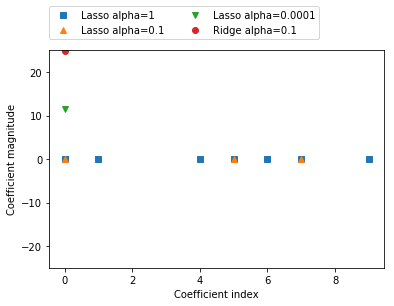

In [49]:
plt.plot(lasso.coef_, 's', label = 'Lasso alpha=1')
plt.plot(lasso01.coef_, '^', label = 'Lasso alpha=0.1')
plt.plot(lasso0001.coef_, 'v', label = 'Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha=0.1')
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()